# Transport Demand Prediction - Full Project Pipeline

In [1]:
# Step 1: Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [2]:
# Step 2: Load the Dataset
df = pd.read_csv(r"C:\Users\mandu\OneDrive\Pictures\Documents\train_revised.csv")

In [3]:
# Step 3: Display First Few Rows
print("\nSample Data:")
print(df.head())


Sample Data:
   ride_id seat_number payment_method payment_receipt travel_date travel_time  \
0     1442         15A          Mpesa      UZUEHCBUSO    17-10-17        7:15   
1     5437         14A          Mpesa      TIHLBUSGTE    19-11-17        7:12   
2     5710          8B          Mpesa      EQX8Q5G19O    26-11-17        7:05   
3     5777         19A          Mpesa      SGP18CL0ME    27-11-17        7:10   
4     5778         11A          Mpesa      BM97HFRGL9    27-11-17        7:12   

  travel_from travel_to car_type  max_capacity  
0      Migori   Nairobi      Bus            49  
1      Migori   Nairobi      Bus            49  
2      Keroka   Nairobi      Bus            49  
3    Homa Bay   Nairobi      Bus            49  
4      Migori   Nairobi      Bus            49  


In [4]:
# Step 4: Check Data Info
print("\nDataset Information:")
df.info()


Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51645 entries, 0 to 51644
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   ride_id          51645 non-null  int64 
 1   seat_number      51645 non-null  object
 2   payment_method   51645 non-null  object
 3   payment_receipt  51645 non-null  object
 4   travel_date      51645 non-null  object
 5   travel_time      51645 non-null  object
 6   travel_from      51645 non-null  object
 7   travel_to        51645 non-null  object
 8   car_type         51645 non-null  object
 9   max_capacity     51645 non-null  int64 
dtypes: int64(2), object(8)
memory usage: 3.9+ MB


In [5]:
# Step 5: Check for Missing Values
print("\nMissing Values Per Column:")
print(df.isnull().sum())


Missing Values Per Column:
ride_id            0
seat_number        0
payment_method     0
payment_receipt    0
travel_date        0
travel_time        0
travel_from        0
travel_to          0
car_type           0
max_capacity       0
dtype: int64


In [54]:
# Step 6: Statistical Summary of Numeric Columns
print("\nStatistical Summary:")
print(df.describe())


Statistical Summary:
            ride_id  max_capacity
count  51645.000000  51645.000000
mean   10188.645793     34.534321
std     2211.295708     18.451193
min     1442.000000     11.000000
25%     8287.000000     11.000000
50%    10353.000000     49.000000
75%    12029.000000     49.000000
max    20117.000000     49.000000


In [55]:
# Step 7: Display Column Names
print("\nColumn Names:")
print(df.columns.tolist())


Column Names:
['ride_id', 'seat_number', 'payment_method', 'payment_receipt', 'travel_date', 'travel_time', 'travel_from', 'travel_to', 'car_type', 'max_capacity']


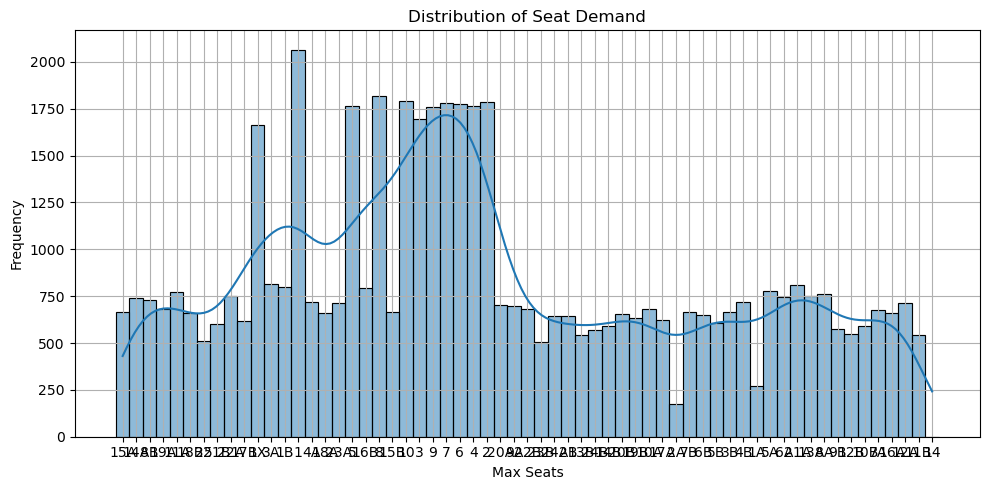

In [56]:
# Step 8: Basic Visualization
plt.figure(figsize=(10, 5))
sns.histplot(df['seat_number'], bins=30, kde=True)
plt.title("Distribution of Seat Demand")
plt.xlabel("Max Seats")
plt.ylabel("Frequency")
plt.grid(True)
plt.tight_layout()
plt.show()

In [57]:
# Step 9: Data Cleaning
print("\nCleaning Data...")
df['travel_date'] = pd.to_datetime(df['travel_date'])
df.dropna(inplace=True)


Cleaning Data...


C:\Users\mandu\AppData\Local\Temp\ipykernel_12476\3507029868.py:3: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['travel_date'] = pd.to_datetime(df['travel_date'])


In [ ]:
# Step 10: Split into Features and Target
X = df.drop(['seat_number', 'travel_date'], axis=1)
y = df['seat_number']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
print(X_train.dtypes)

from sklearn.preprocessing import LabelEncoder

# Apply Label Encoding to all object columns
label_encoders = {}

for col in X_train.columns:
    if X_train[col].dtype == 'object':
        le = LabelEncoder()
        X_train[col] = le.fit_transform(X_train[col].astype(str))
        X_test[col] = le.transform(X_test[col].astype(str))
        label_encoders[col] = le
        from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier()
model.fit(X_train, y_train_encoded)  # Now both X and y are numeric



ride_id                   int64
payment_method            int32
payment_receipt           int32
travel_time              object
max_capacity              int64
day                       int32
month                     int32
weekday                   int32
travel_from_Homa Bay       bool
travel_from_Kehancha       bool
travel_from_Kendu Bay      bool
travel_from_Keroka         bool
travel_from_Keumbu         bool
travel_from_Kijauri        bool
travel_from_Kisii          bool
travel_from_Mbita          bool
travel_from_Migori         bool
travel_from_Ndhiwa         bool
travel_from_Nyachenge      bool
travel_from_Oyugis         bool
travel_from_Rodi           bool
travel_from_Rongo          bool
travel_from_Sirare         bool
travel_from_Sori           bool
car_type_shuttle           bool
dtype: object


RandomForestClassifier()

In [ ]:
# Step 12: Feature Engineering
df['day'] = df['travel_date'].dt.day
df['month'] = df['travel_date'].dt.month
df['weekday'] = df['travel_date'].dt.weekday
df = pd.get_dummies(df, columns=['travel_from', 'car_type', 'travel_to'], drop_first=True)

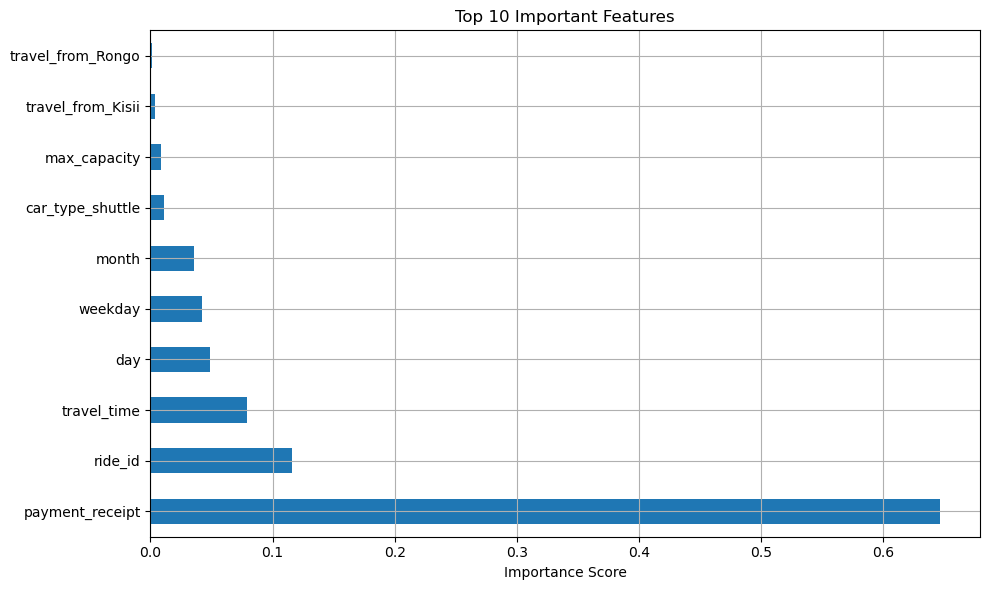

In [ ]:
# Step 14: Feature Importance
importances = pd.Series(model.feature_importances_, index=X.columns)
plt.figure(figsize=(10, 6))
importances.nlargest(10).plot(kind='barh')
plt.title("Top 10 Important Features")
plt.xlabel("Importance Score")
plt.grid(True)
plt.tight_layout()
plt.show()